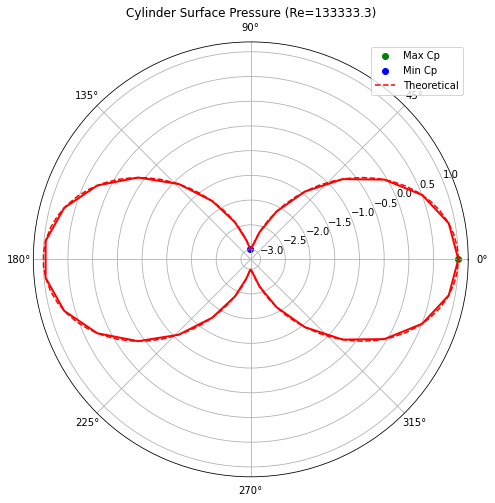

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class AerodynamicCalculator:
    def __init__(self, U, a, nu=1.5e-5):
        self.U = U  # 来流速度(m/s)
        self.a = a  # 圆柱半径(m)
        self.nu = nu  # 运动粘度(m²/s)

    def compute_pressure(self, z_samples):
        """计算指定位置的压力系数"""
        V = self.U * (1 - (self.a ** 2) / (z_samples ** 2))
        V_mag = np.abs(V)
        Cp = 1 - (V_mag / self.U) ** 2
        return Cp

    def export_report(self, filename):
        """生成标准化气动分析报告"""
        # 生成角度序列与采样坐标
        theta = np.linspace(0, 2 * np.pi, 36)
        z_samples = self.a * np.exp(1j * theta)

        # 计算各参数
        Cp = self.compute_pressure(z_samples)
        V = self.U * (1 - (self.a ** 2) / (z_samples ** 2))

        # 计算雷诺数
        Re = (2 * self.U * self.a) / self.nu

        # 构建DataFrame并导出
        df = pd.DataFrame({
            'theta_deg': np.degrees(theta),
            'Cp': Cp,
            'V_real': V.real,
            'V_imag': V.imag
        })
        df.to_csv(filename, index=False, float_format='%.4f')

        # 可视化验证模块
        plt.figure(figsize=(8, 8))
        plt.subplot(polar=True)
        plt.plot(theta, Cp, 'r-', lw=2)
        plt.title(f'Cylinder Surface Pressure (Re={Re:.1f})')

        # 标注最大/最小压力点
        max_index = np.argmax(Cp)
        min_index = np.argmin(Cp)
        plt.scatter(theta[max_index], Cp[max_index], color='green', label='Max Cp')
        plt.scatter(theta[min_index], Cp[min_index], color='blue', label='Min Cp')

        # 添加理论曲线对比
        theta_theory = np.linspace(0, 2 * np.pi, 100)
        z_theory = self.a * np.exp(1j * theta_theory)
        V_theory = self.U * (1 - (self.a ** 2) / (z_theory ** 2))
        V_mag_theory = np.abs(V_theory)
        Cp_theory = 1 - (V_mag_theory / self.U) ** 2
        plt.plot(theta_theory, Cp_theory, '--', label='Theoretical', color='red')

        plt.legend()
        plt.savefig('pressure_distribution.png')


# 使用示例
U = 1.0
a = 1.0
calculator = AerodynamicCalculator(U, a)
calculator.export_report('pressure_report.csv')